In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
suv_data=pd.read_csv("suv_data.csv")

In [10]:
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

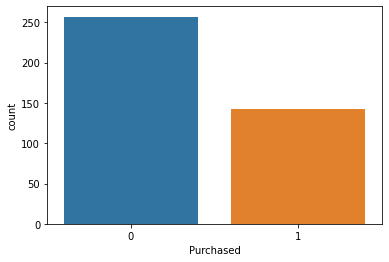

In [6]:
sns.countplot(x="Purchased", data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

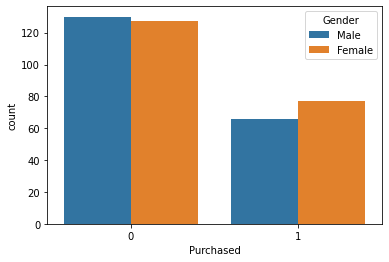

In [7]:
sns.countplot(x="Purchased", hue="Gender", data=suv_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

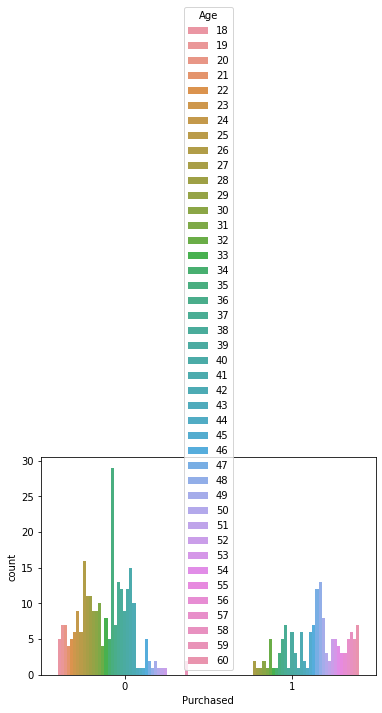

In [8]:
sns.countplot(x="Purchased", hue="Age", data=suv_data)

<AxesSubplot:ylabel='Frequency'>

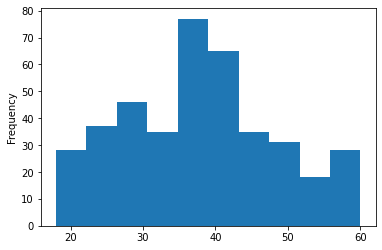

In [12]:
suv_data["Age"].plot.hist()

<AxesSubplot:xlabel='Purchased', ylabel='count'>

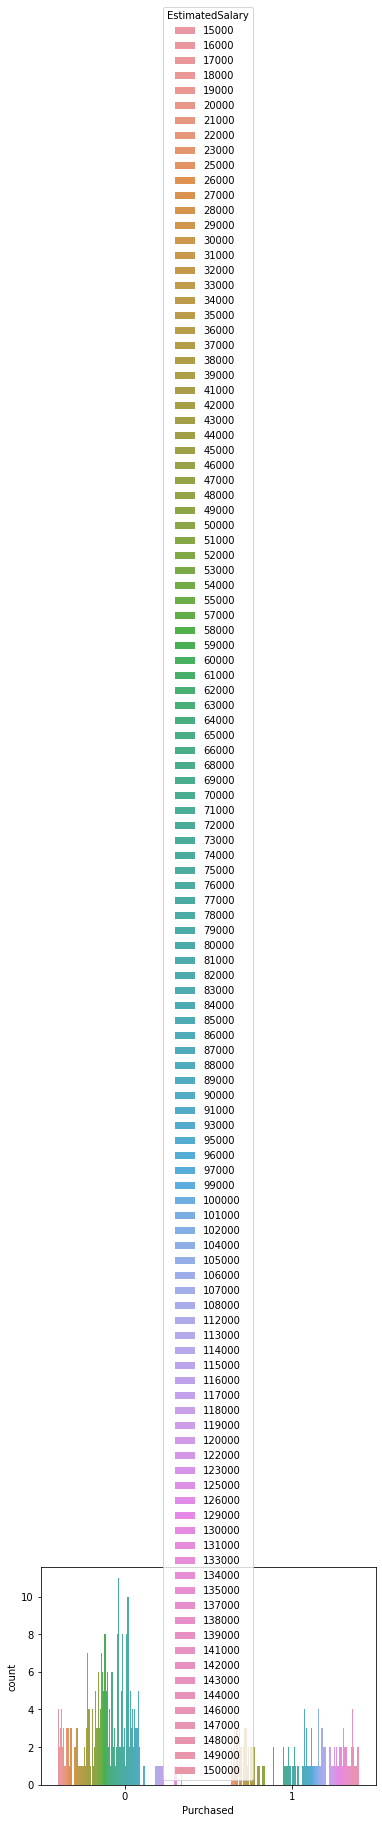

In [14]:
sns.countplot(x="Purchased", hue="EstimatedSalary", data=suv_data)

In [16]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
sex=pd.get_dummies(suv_data["Gender"], drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [18]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
suv_data=pd.concat([suv_data, sex], axis=1)

In [21]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [23]:
suv_data.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [24]:
suv_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<AxesSubplot:>

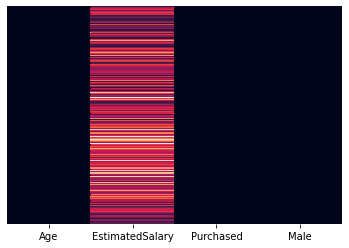

In [27]:
sns.heatmap(suv_data, yticklabels=False, cbar=False)

In [28]:
suv_data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Male               0
dtype: int64

In [31]:
X=suv_data.drop("Purchased", axis=1)
y=suv_data["Purchased"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
reg=LogisticRegression()

In [36]:
reg.fit(X_train,y_train)

LogisticRegression()

In [47]:
predictions=reg.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, predictions)

array([[80,  0],
       [52,  0]], dtype=int64)

In [50]:
classification_report(y_test, predictions)

c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.75        80\n           1       0.00      0.00      0.00        52\n\n    accuracy                           0.61       132\n   macro avg       0.30      0.50      0.38       132\nweighted avg       0.37      0.61      0.46       132\n'

In [51]:
accuracy_score(y_test, predictions)

0.6060606060606061